In [1]:
import pandas as pd
import missingno as msno

### Описание датасета:
- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


### 1. Загрузите датасет и ознакомьтесь с количеством пропущенных значений.

In [2]:
df = pd.read_csv("./vehicles_dataset.csv")

In [3]:
df.shape

(10050, 27)

In [4]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'price_category'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10050 non-null  int64  
 1   url             10050 non-null  object 
 2   region          10050 non-null  object 
 3   region_url      10050 non-null  object 
 4   price           10050 non-null  int64  
 5   year            10014 non-null  float64
 6   manufacturer    9665 non-null   object 
 7   model           9921 non-null   object 
 8   condition       6268 non-null   object 
 9   cylinders       5953 non-null   object 
 10  fuel            9987 non-null   object 
 11  odometer        10007 non-null  float64
 12  title_status    9884 non-null   object 
 13  transmission    10005 non-null  object 
 14  VIN             6086 non-null   object 
 15  drive           7026 non-null   object 
 16  size            2825 non-null   object 
 17  type            7845 non-null  

In [6]:
(df.isna().sum() / len(df) * 100).sort_values()

id                  0.000000
url                 0.000000
region              0.000000
region_url          0.000000
price               0.000000
state               0.000000
price_category      0.000000
description         0.019900
image_url           0.019900
posting_date        0.019900
year                0.358209
odometer            0.427861
transmission        0.447761
fuel                0.626866
long                0.985075
lat                 0.985075
model               1.283582
title_status        1.651741
manufacturer        3.830846
type               21.940299
paint_color        29.482587
drive              30.089552
condition          37.631841
VIN                39.442786
cylinders          40.766169
size               71.890547
county            100.000000
dtype: float64

<Axes: >

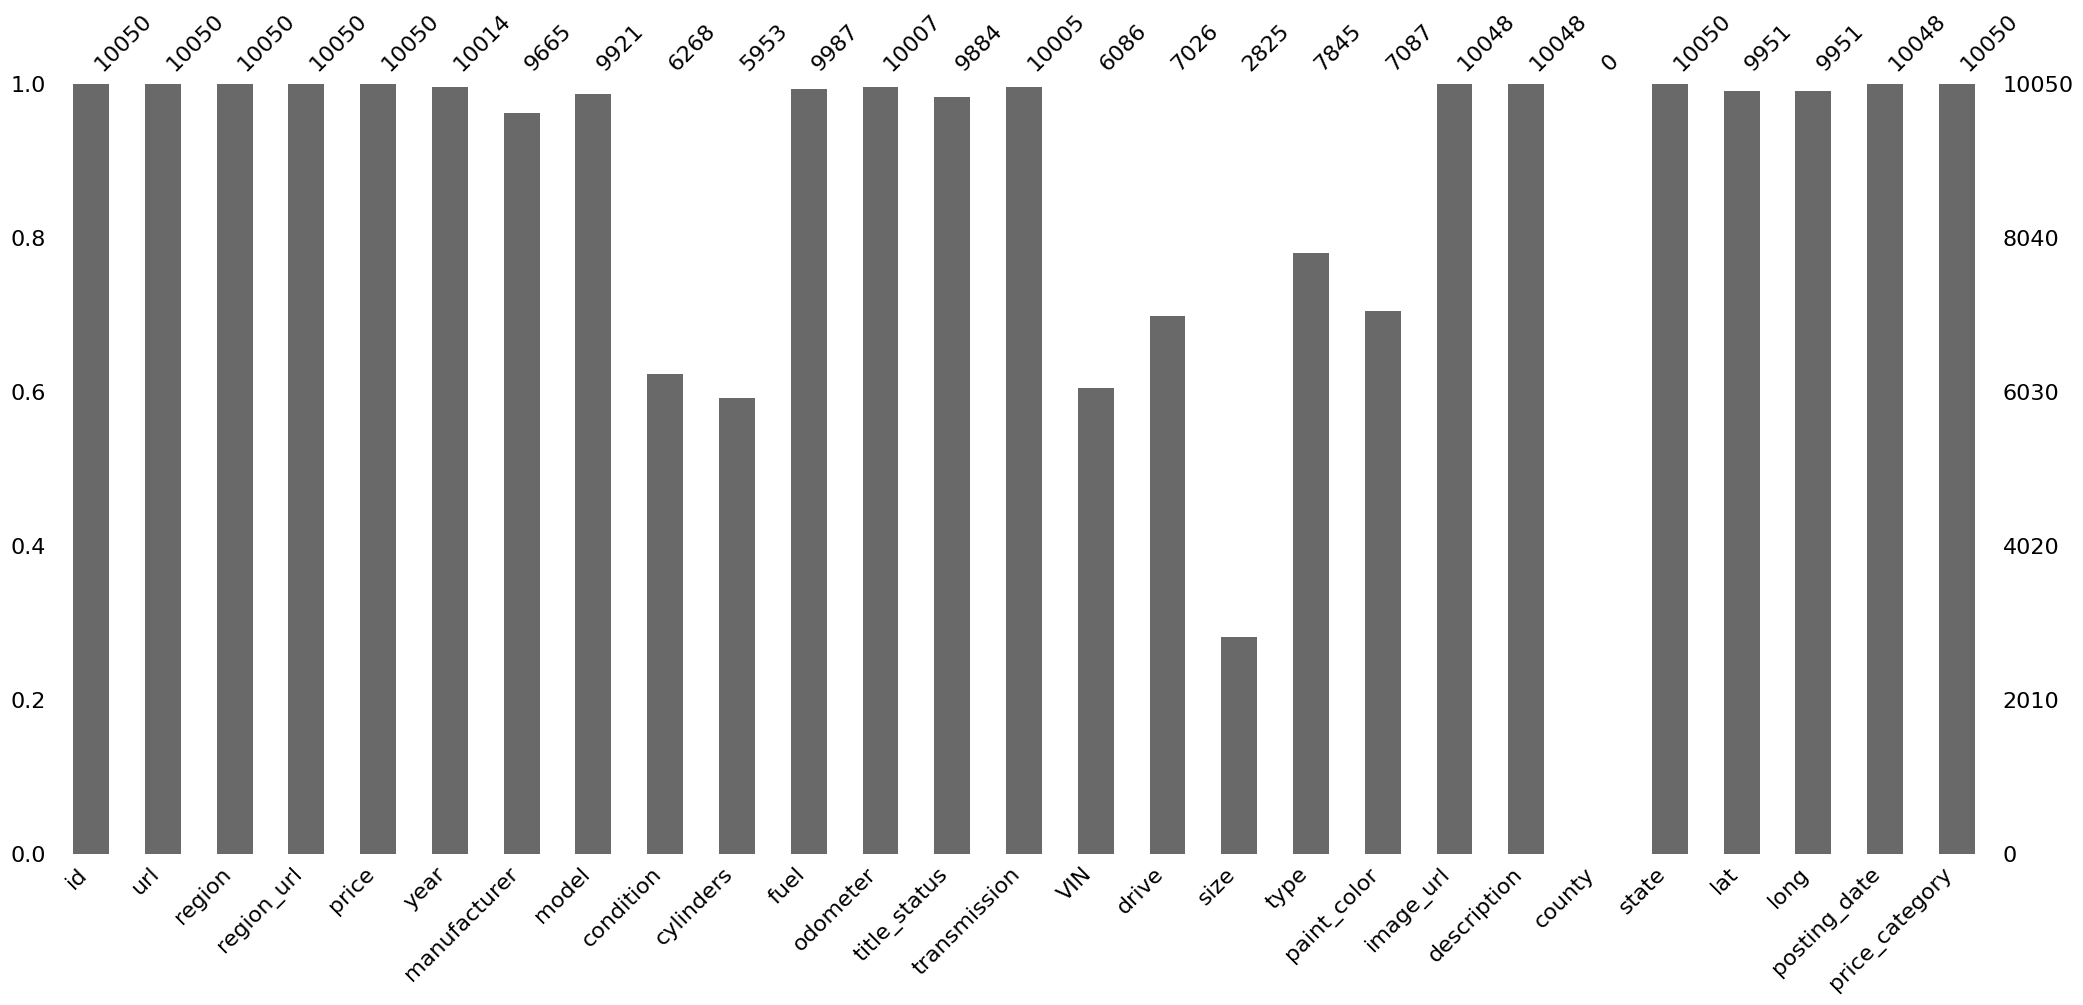

In [7]:
msno.bar(df)

<Axes: >

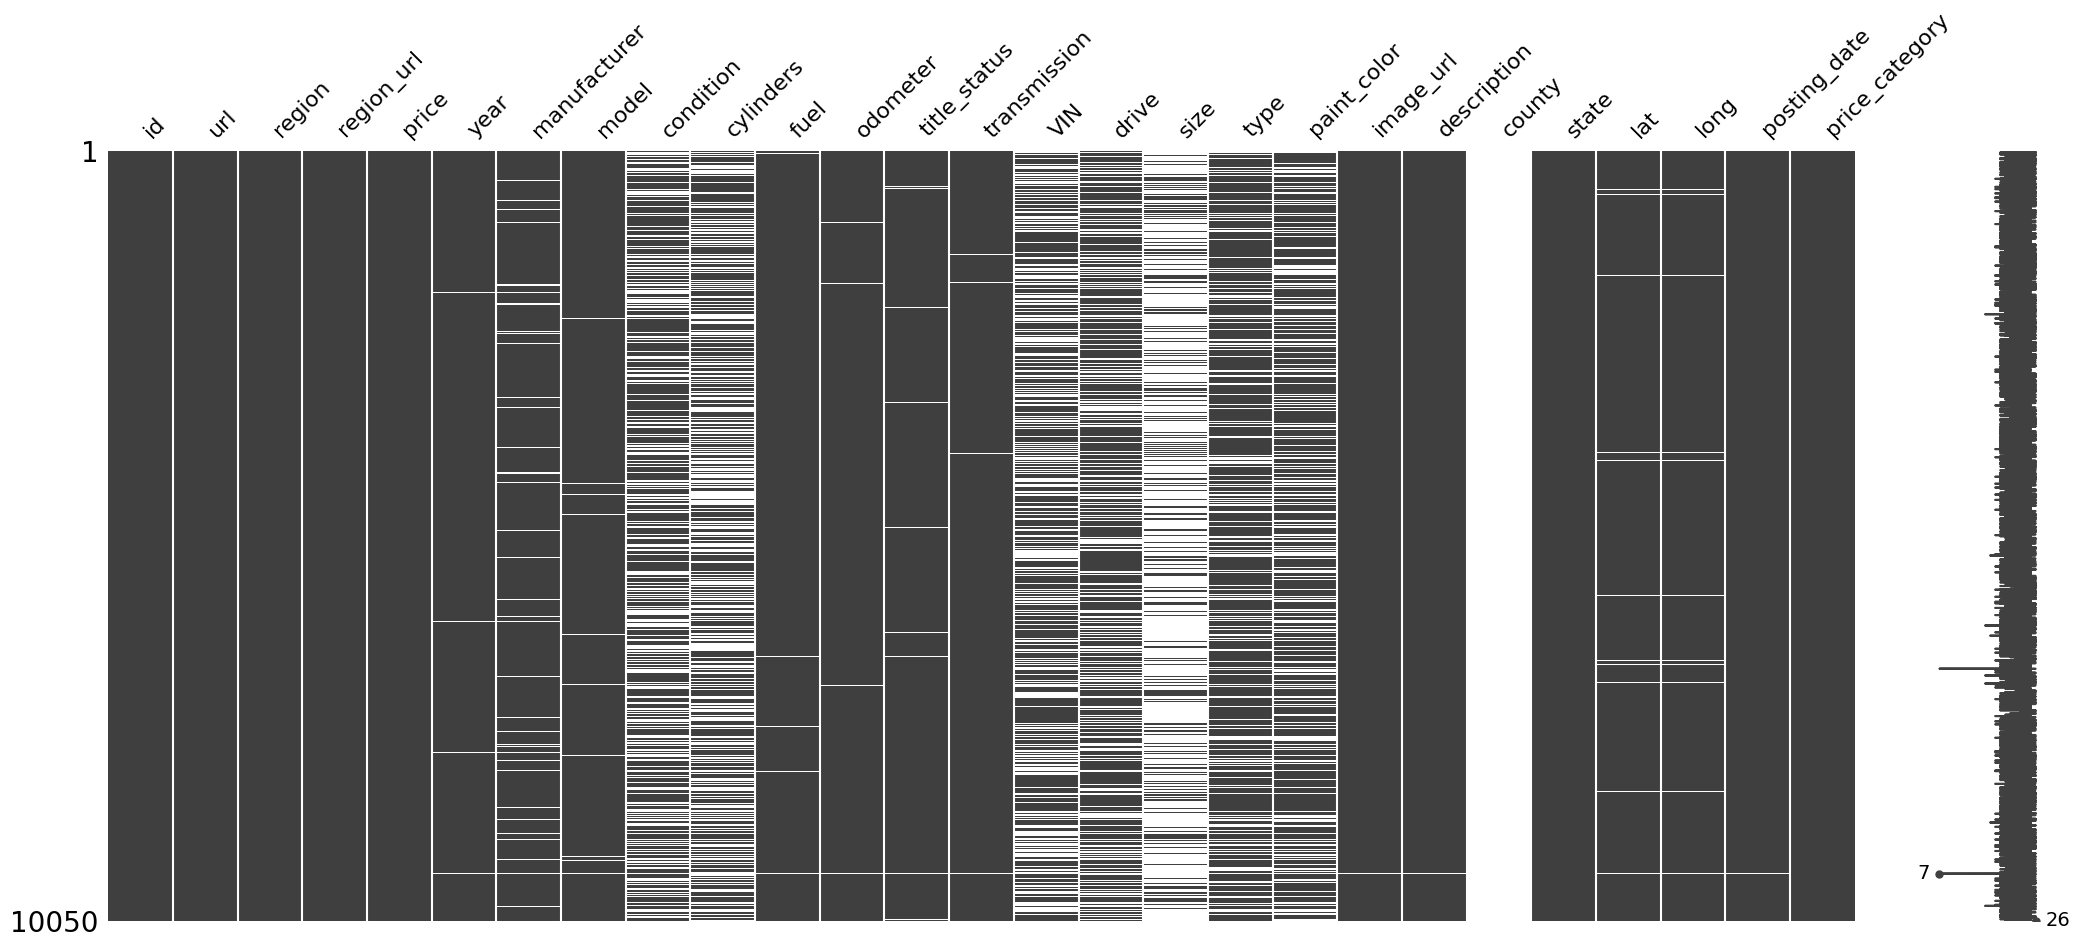

In [8]:
msno.matrix(df)

### Переменная для измененного датасета

In [9]:
df_clear = df.copy()
df_clear = df_clear.drop_duplicates()
df_clear = df_clear.drop(columns=["county"])

### 2. Обработайте пропуски в годе выпуска автомобиля.

In [10]:
df["year"].describe()

count    10014.000000
mean      2010.917815
std          9.697849
min       1915.000000
25%       2008.000000
50%       2013.000000
75%       2017.000000
max       2022.000000
Name: year, dtype: float64

In [11]:
df["year"].isna().sum()

np.int64(36)

In [12]:
df["year"].value_counts()

year
2017.0    814
2018.0    814
2016.0    748
2013.0    704
2015.0    670
         ... 
1940.0      1
1950.0      1
1960.0      1
1923.0      1
1938.0      1
Name: count, Length: 89, dtype: int64

In [13]:
df["year"].mode(), df["year"].median(), df["year"].mean()

(0    2017.0
 1    2018.0
 Name: year, dtype: float64,
 np.float64(2013.0),
 np.float64(2010.9178150589175))

<Axes: >

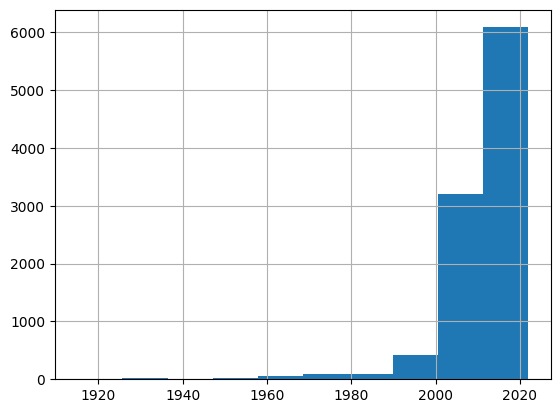

In [14]:
df["year"].hist()

In [15]:
df_clear["year"] = df_clear["year"].fillna(df_clear["year"].median())

In [16]:
df_clear["year"].isna().sum()

np.int64(0)

In [17]:
df_clear["year"].describe()

count    10000.00000
mean      2010.93540
std          9.65541
min       1915.00000
25%       2008.00000
50%       2013.00000
75%       2017.00000
max       2022.00000
Name: year, dtype: float64

По графику видно, что среднее значение не подойдет, потому что большинство данных находится справа.

После замены пропусков на медиану описательные статистики изменились незначительно

### 3. Обработайте пропуски в типе топлива.

In [18]:
df["fuel"].value_counts(dropna=False)

fuel
gas         8447
other        733
diesel       655
hybrid       108
NaN           63
electric      44
Name: count, dtype: int64

<Axes: >

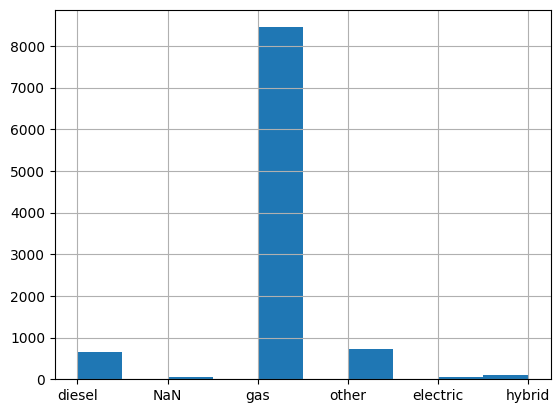

In [19]:
df["fuel"].fillna("NaN").hist()

In [20]:
df_clear["fuel"] = df_clear["fuel"].fillna(df_clear["fuel"].mode()[0])

In [21]:
df_clear["fuel"].value_counts(dropna=False)

fuel
gas         8465
other        730
diesel       653
hybrid       108
electric      44
Name: count, dtype: int64

fuel - это качественная переменная. подавляющее большинство у значения gas, поэтому пропуски были заполнены им (модой)

### 4. Обработайте пропуски в модели автомобиля.

In [22]:
df["model"].value_counts(dropna=False)

model
f-150                          151
NaN                            129
silverado 1500                 110
1500                           101
camry                           77
                              ... 
prius four hatchback 4d          1
rendezvous                       1
7 series 740li xdrive sedan      1
FREIGHTLINER M2 106              1
xf 4dr sedan                     1
Name: count, Length: 3467, dtype: int64

In [23]:
df_clear["model"] = df_clear["model"].fillna("unknown")

Пропуск находится на втором месте по популярности, потому что много уникальных данных. Если заполнить модой, то сильно увеличится количество у моды. Выбрал создать новую категорию 

### 5. Обработайте пропуски в статусе автомобиля.

In [24]:
df["title_status"].value_counts(dropna=False)

title_status
clean         9568
rebuilt        171
NaN            166
salvage         92
lien            35
missing         16
parts only       2
Name: count, dtype: int64

<Axes: >

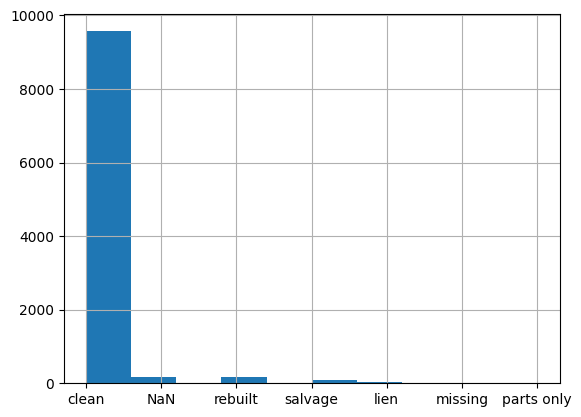

In [25]:
df["title_status"].fillna("NaN").hist()

In [26]:
df_clear["title_status"] = df_clear["title_status"].fillna(df_clear["title_status"].mode()[0])

In [27]:
df_clear["title_status"].value_counts(dropna=False)

title_status
clean         9684
rebuilt        171
salvage         92
lien            35
missing         16
parts only       2
Name: count, dtype: int64

Ситуация такая же как и с типом топлива

### 6. Преобразуйте типы данных в годе выпуска автомобиля.

In [28]:
df_clear["year"].head()

0    2020.0
1    2016.0
2    2017.0
3    2013.0
4    2021.0
Name: year, dtype: float64

In [29]:
df_clear["year"] = df_clear["year"].astype(int)

In [30]:
df_clear["year"].head()

0    2020
1    2016
2    2017
3    2013
4    2021
Name: year, dtype: int64

### 7. Преобразуйте типы данных в категориальные переменные.

In [31]:
df_clear.dtypes

id                  int64
url                object
region             object
region_url         object
price               int64
year                int64
manufacturer       object
model              object
condition          object
cylinders          object
fuel               object
odometer          float64
title_status       object
transmission       object
VIN                object
drive              object
size               object
type               object
paint_color        object
image_url          object
description        object
state              object
lat               float64
long              float64
posting_date       object
price_category     object
dtype: object

In [32]:
df_clear["price_category"].value_counts()

price_category
high      3495
medium    3280
low       3225
Name: count, dtype: int64

In [33]:
category_columns = [
    "region",
    "region_url",
    # "year",
    "manufacturer",
    "condition",
    "cylinders",
    "fuel",
    "title_status",
    "transmission",
    "drive",
    "size",
    "type",
    "paint_color",
    "state",
    "price_category"
]
df_clear[category_columns] = df_clear[category_columns].astype("category")

### 8. Определите выбросы в годе выпуска.

In [34]:
df_clear["year"].describe()

count    10000.00000
mean      2010.93540
std          9.65541
min       1915.00000
25%       2008.00000
50%       2013.00000
75%       2017.00000
max       2022.00000
Name: year, dtype: float64

In [35]:
def calculate_outliers(data: pd.Series) -> tuple[float, float]:
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries

In [36]:
boundaries = calculate_outliers(df_clear["year"])
boundaries

(np.float64(1994.5), np.float64(2030.5))

In [37]:
is_outlier = (df_clear["year"] < boundaries[0]) | (df_clear["year"] > boundaries[1])


In [38]:
is_outlier.sum()


np.int64(394)

In [39]:
is_outlier.sum() / len(df) 


np.float64(0.03920398009950249)

<Axes: >

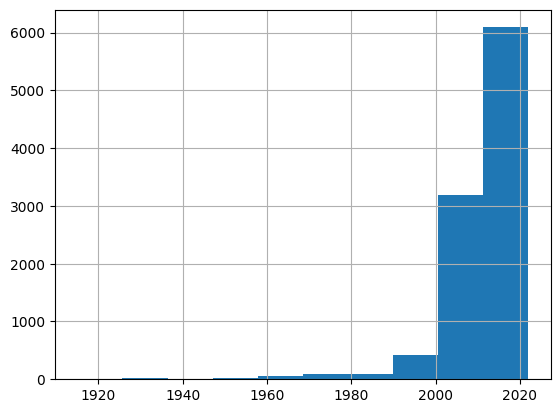

In [40]:
df_clear["year"].hist()

<Axes: >

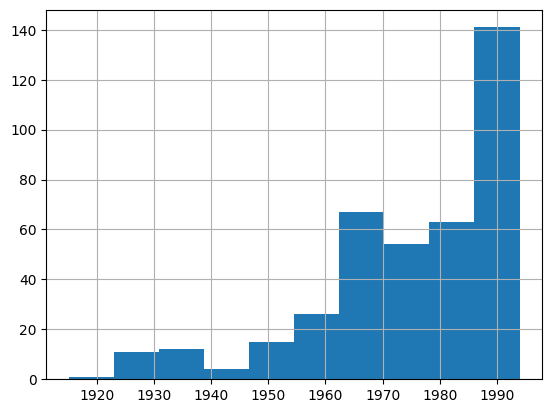

In [41]:
df_clear[is_outlier]["year"].hist()

<Axes: >

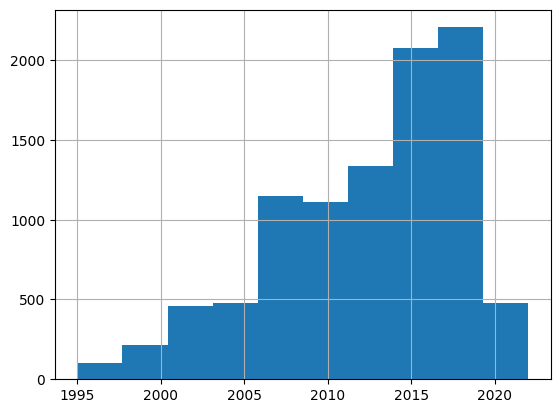

In [42]:
df_clear[~is_outlier]["year"].hist()

определил, про удаление ничего не сказано

### 9. Необязательная задача: загрузите датафрейм с параметрами преобразования.

In [43]:
df_clear.to_csv("vehicles_dataset_clear.csv", index=False)